# Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

**NON-SEPARABLE CLASSIFICATION – MULTI-FONT CHARACTER RECOGNITION:**

This problem is a multi-input and multi-output classification issue that we would like to solve by SVM algorithm. This is a classification problem which involves 7 classes as outputs and 10 features or inputs. So, this is a 10-dimensional problem. The task here is to design and train an SVM to minimize the error between actual and predicted output values. We have 2500 data points as training dataset and 250 datapoints as testing dataset. The steps I did from beginning to end will be explained in the following.
Note: Here, data is not linearly separable, so, we need to combine SVM with kernels that help SVM become extremely powerful.
Although we have 7 outputs or classes, after encoding these outputs, we have a multi-class classification problem that need to solve as 26 binary classification problems. 

In [ ]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
#Load data from local drive 
from google.colab import files
uploaded = files.upload()

Saving Pattern_test.csv to Pattern_test.csv
Saving Pattern_train.csv to Pattern_train.csv


In [ ]:
#Load data set
pattern_train = pd.read_csv('Pattern_train.csv')
pattern_test = pd.read_csv('Pattern_test.csv')

In [ ]:
pattern_train.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0  -1.691  -2.426   1.440  -2.688   2.240  -2.577   1.541  -0.045  -1.093   
1   1.337  -0.014  -1.134   1.714   1.821  -1.989  -1.056  -1.823   2.408   
2  -0.278   0.169  -2.756  -0.819   2.074   2.179  -0.616   1.405  -2.847   
3   1.156   1.827   1.084  -0.675  -2.409   2.970   1.037  -1.972  -0.191   
4  -2.849  -2.715   0.909  -0.211   2.050  -2.632   1.746  -0.534   1.426   

   input10  in_control  fault1  fault2  fault3  fault4  fault5  fault6  
0   -0.498           1       0       0       0       0       0       0  
1    0.906           1       0       0       0       0       0       0  
2    0.325           1       0       0       0       0       0       0  
3    1.514           1       0       0       0       0       0       0  
4   -1.512           1       0       0       0       0       0       0

 ***Exploratory data analysis ***
 
 Now, I will explore the data to gain insights about the data.

In [ ]:
# view dimensions of dataset
pattern_train.shape

(2500, 17)

In [ ]:
pattern_test.shape

(250, 17)

In [ ]:
pattern_train.describe()

input1       input2       input3       input4       input5  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean     -0.005568     0.034232    -0.019945     0.008083    -0.021666   
std       1.658949     1.661364     1.616737     1.673683     1.585194   
min      -2.997000    -2.995000    -2.997000    -2.996000    -2.996000   
25%      -1.353250    -1.320500    -1.302250    -1.387250    -1.442750   
50%      -0.018500     0.065500     0.022500     0.054000     0.021500   
75%       1.392000     1.386750     1.270000     1.349250     1.359500   
max       2.998000     3.000000     2.995000     2.997000     2.999000   

            input6       input7       input8       input9      input10  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean     -0.022674     0.023896    -0.001836    -0.010894    -0.027626   
std       1.534029     1.483411     1.501475     1.536349     1.998715   
min      -2.994000    -2.999000    -2.991000    -3.000000    -4.476000   
25%      -1.229250    -1.003250    -1.067250    -1.142000    -1.586500   
50%      -0.053500     0.035000    -0.011000     0.043500    -0.008500   
75%       1.191500     1.074250     1.042500     1.106250     1.493250   
max       2.994000     2.997000     3.000000     2.996000     4.491000   

        in_control      fault1      fault2      fault3      fault4  \
count  2500.000000  2500.00000  2500.00000  2500.00000  2500.00000   
mean      0.400000     0.10000     0.10000     0.10000     0.10000   
std       0.489996     0.30006     0.30006     0.30006     0.30006   
min       0.000000     0.00000     0.00000     0.00000     0.00000   
25%       0.000000     0.00000     0.00000     0.00000     0.00000   
50%       0.000000     0.00000     0.00000     0.00000     0.00000   
75%       1.000000     0.00000     0.00000     0.00000     0.00000   
max       1.000000     1.00000     1.00000     1.00000     1.00000   

           fault5      fault6  
count  2500.00000  2500.00000  
mean      0.10000     0.10000  
std       0.30006     0.30006  
min       0.00000     0.00000  
25%       0.00000     0.00000  
50%       0.00000     0.00000  
75%       0.00000     0.00000  
max       1.00000     1.00000

I will check **target distribution** to know whetherI have class imbalanced or not.

In [ ]:
# check distribution of target_class column
#We have three different alphabets for training data, so, we have three 'A', three 'B',...,three 'Z'

pattern_train['in_control'].value_counts()
#pattern_train['fault6'].value_counts()

0    1500
1    1000
Name: in_control, dtype: int64

In [ ]:
pattern_train['fault6'].value_counts()

0    2250
1     250
Name: fault6, dtype: int64

In [ ]:
# view the percentage distribution of target_class column

pattern_train['fault3'].value_counts()/float(len(pattern_train))

0    0.9
1    0.1
Name: fault3, dtype: float64

 So, this is **a class imbalanced problem**.

In [ ]:
# view summary of dataset

pattern_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   input1      2500 non-null   float64
 1   input2      2500 non-null   float64
 2   input3      2500 non-null   float64
 3   input4      2500 non-null   float64
 4   input5      2500 non-null   float64
 5   input6      2500 non-null   float64
 6   input7      2500 non-null   float64
 7   input8      2500 non-null   float64
 8   input9      2500 non-null   float64
 9   input10     2500 non-null   float64
 10  in_control  2500 non-null   int64  
 11  fault1      2500 non-null   int64  
 12  fault2      2500 non-null   int64  
 13  fault3      2500 non-null   int64  
 14  fault4      2500 non-null   int64  
 15  fault5      2500 non-null   int64  
 16  fault6      2500 non-null   int64  
dtypes: float64(10), int64(7)
memory usage: 332.2 KB


In [ ]:
# view summary of dataset

pattern_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   input1      250 non-null    float64
 1   input2      250 non-null    float64
 2   input3      250 non-null    float64
 3   input4      250 non-null    float64
 4   input5      250 non-null    float64
 5   input6      250 non-null    float64
 6   input7      250 non-null    float64
 7   input8      250 non-null    float64
 8   input9      250 non-null    float64
 9   input10     250 non-null    float64
 10  in_control  250 non-null    int64  
 11  fault1      250 non-null    int64  
 12  fault2      250 non-null    int64  
 13  fault3      250 non-null    int64  
 14  fault4      250 non-null    int64  
 15  fault5      250 non-null    int64  
 16  fault6      250 non-null    int64  
dtypes: float64(10), int64(7)
memory usage: 33.3 KB


We can see that there are no missing values in the dataset and all the variables are numerical variables.

**Summary of numerical variables**

There are 2500 numerical variables in train and 250 in test datasets.

10 are continuous variables and 7 are discrete variable.

The discrete variables are target variables. 

There are no missing values in the dataset.

**Outliers:**

On closer inspection, we can suspect that all the continuous variables may contain outliers. I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'input10')

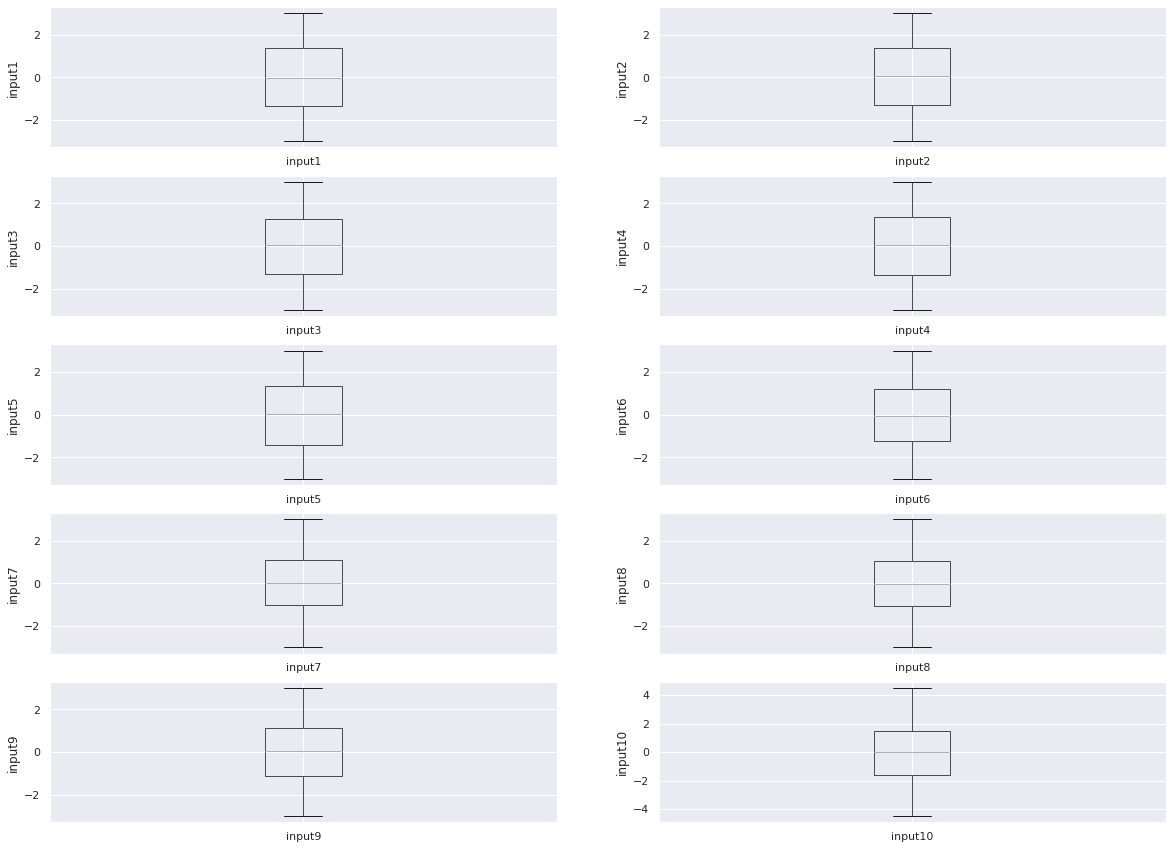

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20,15))


plt.subplot(5, 2, 1)
fig = pattern_train.boxplot(column='input1')
fig.set_title('')
fig.set_ylabel('input1')


plt.subplot(5, 2, 2)
fig = pattern_train.boxplot(column='input2')
fig.set_title('')
fig.set_ylabel('input2')


plt.subplot(5, 2, 3)
fig = pattern_train.boxplot(column='input3')
fig.set_title('')
fig.set_ylabel('input3')


plt.subplot(5, 2, 4)
fig = pattern_train.boxplot(column='input4')
fig.set_title('')
fig.set_ylabel('input4')


plt.subplot(5, 2, 5)
fig = pattern_train.boxplot(column='input5')
fig.set_title('')
fig.set_ylabel('input5')


plt.subplot(5, 2, 6)
fig = pattern_train.boxplot(column='input6')
fig.set_title('')
fig.set_ylabel('input6')


plt.subplot(5, 2, 7)
fig = pattern_train.boxplot(column='input7')
fig.set_title('')
fig.set_ylabel('input7')


plt.subplot(5, 2, 8)
fig = pattern_train.boxplot(column='input8')
fig.set_title('')
fig.set_ylabel('input8')

plt.subplot(5, 2, 9)
fig = pattern_train.boxplot(column='input9')
fig.set_title('')
fig.set_ylabel('input9')

plt.subplot(5, 2, 10)
fig = pattern_train.boxplot(column='input10')
fig.set_title('')
fig.set_ylabel('input10')


The above boxplots confirm that there are no outliers in these variables.

In this link, boxplots are clearly explained:

(https://simplypsychology.org/boxplots.html)


**Check the distribution of variables**

Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

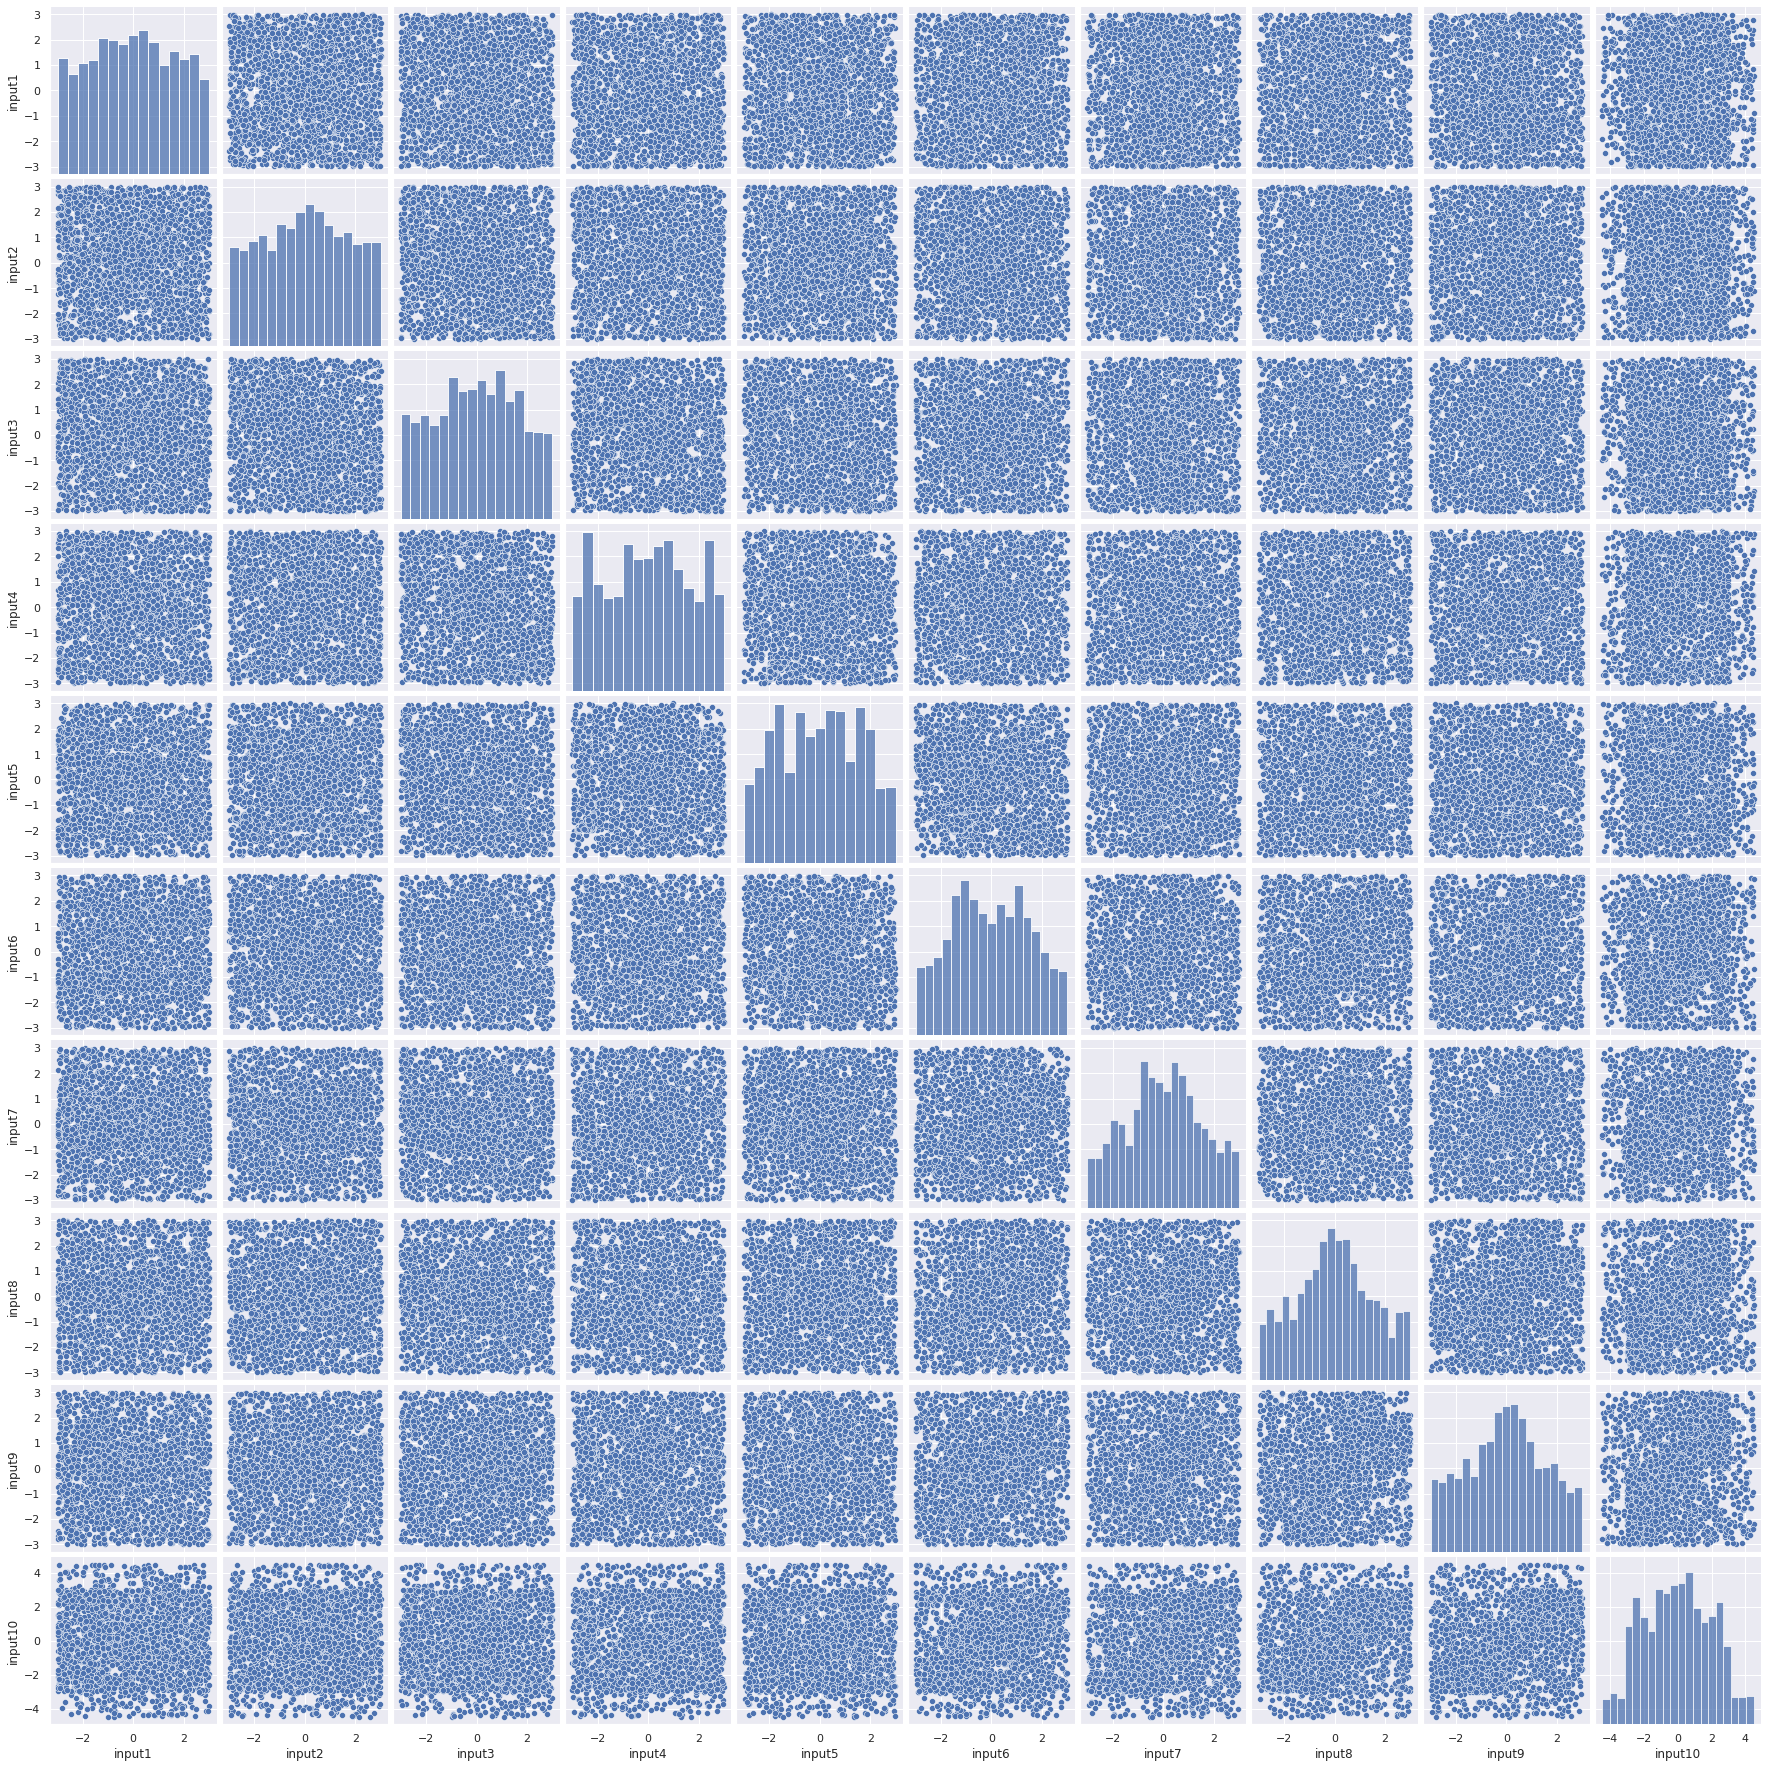

In [ ]:
sns.pairplot(pattern_train[["input1",'input2','input3','input4','input5','input6','input7','input8','input9','input10']])

We can see that three of the 10 continuous variables have bell shape but others are skewed.

**Declare feature vector and target variable**

In [ ]:
# Separate feature and target variables for train dataset
pattern_train = pd.read_csv('Pattern_train.csv')
font_test = pd.read_csv('Pattern_test.csv')
X_train = pattern_train.copy()
y_train = X_train.iloc[:, 10:17]
print(y_train.shape)

(2500, 7)


In [ ]:
y_train.head()

in_control  fault1  fault2  fault3  fault4  fault5  fault6
0           1       0       0       0       0       0       0
1           1       0       0       0       0       0       0
2           1       0       0       0       0       0       0
3           1       0       0       0       0       0       0
4           1       0       0       0       0       0       0

In [ ]:
# Separate feature and target variables for train dataset
X_train.drop(['in_control','fault1','fault2','fault3','fault4','fault5','fault6'], axis = 1, inplace = True)
print(X_train.shape)

(2500, 10)


In [ ]:
# Separate feature and target variables for test dataset
font_test = pd.read_csv('Pattern_test.csv')
X_test = pattern_test.copy() # X_test is a dataframe
y_test = X_test.iloc[:, 10:17]
print(y_test.shape)

(250, 7)


In [ ]:
# Separate feature and target variables for test dataset
X_test.drop(['in_control','fault1','fault2','fault3','fault4','fault5','fault6'], axis = 1, inplace = True)
print(X_test.shape)

(250, 10)


**Check the distribution of variables**

Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

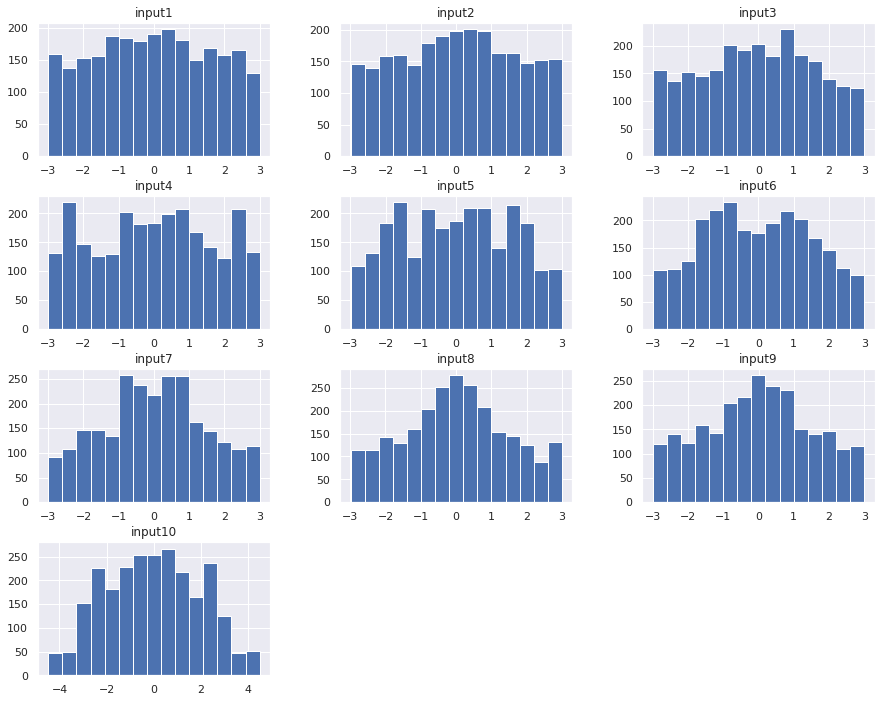

In [ ]:
# plot histogram to check distribution

X_train.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

We can see that all the 14 continuous variables are skewed.

**Feature Scaling**

A standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

Here is an example to scale a iris data matrix to the [0, 1] range:

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train) #fit means training the model which is done on training data, by using this line X_train will be an array not a dataframe
X_train.dtype

dtype('float64')

The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data:

In [ ]:
X_test = scaler.transform(X_test) #The output is an array
X_test
X_test.dtype

dtype('float64')

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols]) #Convert numpy array to dataframe, we do this since we want to add this dataframe to the other dataframe and make a new dataframe

In [ ]:
X_train.describe()

input1       input2       input3       input4       input5  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean      0.498988     0.505293     0.496838     0.501265     0.496136   
std       0.276722     0.277125     0.269816     0.279273     0.264419   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.274187     0.279316     0.282835     0.268438     0.259091   
50%       0.496831     0.510509     0.503922     0.508927     0.503336   
75%       0.732110     0.730901     0.712116     0.725054     0.726522   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            input6       input7       input8       input9      input10  
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  
mean      0.496213     0.504152     0.498942     0.498517     0.496083  
std       0.256184     0.247400     0.250622     0.256229     0.222897  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.294714     0.332847     0.321107     0.309873     0.322237  
50%       0.491065     0.506004     0.497413     0.507588     0.498216  
75%       0.698981     0.679328     0.673260     0.684832     0.665691  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols]) #Convert numpy array to dataframe

In [ ]:
type(y_train)
y_train.head()

in_control  fault1  fault2  fault3  fault4  fault5  fault6
0           1       0       0       0       0       0       0
1           1       0       0       0       0       0       0
2           1       0       0       0       0       0       0
3           1       0       0       0       0       0       0
4           1       0       0       0       0       0       0

**Run SVM with default hyperparameters**

We have support vector classifiers. I will use two of them:'linear' and 'RBF' classifiers

The following is a default hyperparameter SVM.

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,7):
# instantiate classifier with default hyperparameters
  svc=SVC() 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.8400


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.9560


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.9120
Model accuracy score with default hyperparameters: 0.9600


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.9480
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9800


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Multi-class classification problem was solved as multiple binary classification problems by using for loop(instead we could use one vs rest or one vs one methods). Model accuracy score with default hyperparameters for different target columns are: 0.9615, 0.9872, 1

**Run SVM with rbf kernel and C=100.0**

We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,7):
# instantiate classifier with default hyperparameters
  svc=SVC(C=100.0) 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)
  y_pred_test=svc.predict(X_test)

# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.9160
Model accuracy score with default hyperparameters: 0.9880


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.9360
Model accuracy score with default hyperparameters: 0.9560
Model accuracy score with default hyperparameters: 0.9760
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9880


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with rbf kernel and C=100.0 was increased. In other words, the error or difference between the actual and predicted test results is decreased.

We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers and accuracy made better for almost all of the classes except one of them.

Now, I will further increase the value of C=1000.0 and check accuracy.

**Run SVM with C=1000.0**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,7):
# instantiate classifier with default hyperparameters
  svc=SVC(C=1000.0) 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.9240
Model accuracy score with default hyperparameters: 0.9880


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.9360
Model accuracy score with default hyperparameters: 0.9560
Model accuracy score with default hyperparameters: 0.9760
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9880


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In this case, we can see that the accuracy had not changed with C=1000.0

What does it mean when by changing C, accuracy doesn't change?

**Run SVM with 'RBF' kernel and C=100.0**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,7):
# instantiate classifier with default hyperparameters
  svc=SVC(kernel='rbf', C=100.0) 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.9160
Model accuracy score with default hyperparameters: 0.9880


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.9360
Model accuracy score with default hyperparameters: 0.9560
Model accuracy score with default hyperparameters: 0.9760
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9880


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**Run SVM with linear kernel and C=1.0**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,7):
# instantiate classifier with default hyperparameters
  rbf_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
  rbf_svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=rbf_svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.6000
Model accuracy score with default hyperparameters: 0.9000
Model accuracy score with default hyperparameters: 0.9000
Model accuracy score with default hyperparameters: 0.9000
Model accuracy score with default hyperparameters: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.9000
Model accuracy score with default hyperparameters: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


We can see that perfomance of 'rbf' was so better. This is because non-linera separable dataset.

**Run SVM with linear kernel and C=100.0**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,7):
# instantiate classifier with default hyperparameters
  linear_svc=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
  linear_svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=linear_svc.predict(X_test)


# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.6000
Model accuracy score with default hyperparameters: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.9000
Model accuracy score with default hyperparameters: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with default hyperparameters: 0.9000
Model accuracy score with default hyperparameters: 0.9000
Model accuracy score with default hyperparameters: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


We can see that we obtained the same accuracy with C=100.0 as compared to C=1.0. Also, it took too more time for linear kernel SVM than rbf kernel SVM.But 'rbf' kernel has better performance than linear for this non-linear separable dataset.

**Compare the train-set and test-set accuracy for 'rbf' SVM with C=100**

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = rbf_svc.predict(X_train)

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
for i in range(0,7):
  print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train.iloc[:,i], y_pred_train)))

Training-set accuracy score: 0.6000
Training-set accuracy score: 0.9000
Training-set accuracy score: 0.9000
Training-set accuracy score: 0.9000
Training-set accuracy score: 0.9000
Training-set accuracy score: 0.9000
Training-set accuracy score: 0.9000


In [ ]:
# compute and print accuracy score
for i in range(0,7):
  print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

Test-set accuracy score: 0.6000
Test-set accuracy score: 0.9000
Test-set accuracy score: 0.9000
Test-set accuracy score: 0.9000
Test-set accuracy score: 0.9000
Test-set accuracy score: 0.9000
Test-set accuracy score: 0.9000


We can see that the training set accuracies are lower than test-set accuracies. So, there is no overfitting.

**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set
for i in range(0,7):
  print('Training set score: {:.4f}'.format(rbf_svc.score(X_train, y_train.iloc[:,i])))

  print('Test set score: {:.4f}'.format(rbf_svc.score(X_test, y_test.iloc[:,i])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Training set score: 0.6000
Test set score: 0.6000
Training set score: 0.9000
Test set score: 0.9000
Training set score: 0.9000
Test set score: 0.9000
Training set score: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Test set score: 0.9000
Training set score: 0.9000
Test set score: 0.9000
Training set score: 0.9000
Test set score: 0.9000
Training set score: 0.9000
Test set score: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

If differences between test score and training score in the above result are zero which mean it is a good model/fit.

For the first class, train and test scores are 0.6. Very low training score and low test score means under-fitting in this case which has high bias and low variance.

In [ ]:
# print the scores on training and test set
for i in range(0,7):
  print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train.iloc[:,i])))

  print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test.iloc[:,i])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Training set score: 0.6000
Test set score: 0.6000
Training set score: 0.9000
Test set score: 0.9000
Training set score: 0.9000
Test set score: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Training set score: 0.9000
Test set score: 0.9000
Training set score: 0.9000
Test set score: 0.9000
Training set score: 0.9000
Test set score: 0.9000
Training set score: 0.9000
Test set score: 0.9000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**Compare model accuracy with null accuracy**

So, the model accuracy is 0.9 for all classes except one of them. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [ ]:
# check class distribution in test set
for i in range(0,7):
  print(y_test.iloc[:,i].value_counts())

0    150
1    100
Name: in_control, dtype: int64
0    225
1     25
Name: fault1, dtype: int64
0    225
1     25
Name: fault2, dtype: int64
0    225
1     25
Name: fault3, dtype: int64
0    225
1     25
Name: fault4, dtype: int64
0    225
1     25
Name: fault5, dtype: int64
0    225
1     25
Name: fault6, dtype: int64


We can see that the occurences of most frequent class 0 is 150 for the first class and the least frequence class 1 is 100. This can also be seen for other classes. So, we can calculate null accuracy by dividing 150 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (150/(150+100))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6000


We can see that our model accuracy score is 0.6 for the first class and null accuracy score is 0.6. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

**Comments**

We get maximum accuracy with rbf kernel with C=100.0. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, we should note that here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.

So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making.

One such metric to analyze the model performance in imbalanced classes problem is Confusion matrix.

**Confusion Matrix**

To see what will happen, I will repeat the code of performing svc with rbf kernel and C=100:

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

for i in range(0,7):
# instantiate classifier with default hyperparameters
  svc=SVC(kernel = 'rbf', C=100.0) 


# fit classifier to training set
  svc.fit(X_train,y_train.iloc[:,i])


# make predictions on test set
  y_pred=svc.predict(X_test)
  y_pred_test=svc.predict(X_test)

# compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test.iloc[:,i], y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.9160
Model accuracy score with default hyperparameters: 0.9880


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Model accuracy score with default hyperparameters: 0.9360
Model accuracy score with default hyperparameters: 0.9560
Model accuracy score with default hyperparameters: 0.9760
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.9880


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [ ]:
# y_test is a pandas dataframe. Each column of it, is a pandas series. 
y_test2 = np.zeros((7, 250))
for i in range(0,7):
  #y_test1 = y_test.iloc[:,i]
  y_test2[i] = y_test.iloc[:,i] # To convert pandas series to numpy array
y_test2
y_test2.shape

(7, 250)

In [ ]:
y_pred_test.shape

(250,)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
for i in range(0,7):
  cm = confusion_matrix(y_test2[i], y_pred_test)

  print('Confusion matrix\n\n', cm)

  print('\nTrue Positives(TP) = ', cm[0,0])

  print('\nTrue Negatives(TN) = ', cm[1,1])

  print('\nFalse Positives(FP) = ', cm[0,1])

  print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[128  22]
 [100   0]]

True Positives(TP) =  128

True Negatives(TN) =  0

False Positives(FP) =  22

False Negatives(FN) =  100
Confusion matrix

 [[203  22]
 [ 25   0]]

True Positives(TP) =  203

True Negatives(TN) =  0

False Positives(FP) =  22

False Negatives(FN) =  25
Confusion matrix

 [[203  22]
 [ 25   0]]

True Positives(TP) =  203

True Negatives(TN) =  0

False Positives(FP) =  22

False Negatives(FN) =  25
Confusion matrix

 [[203  22]
 [ 25   0]]

True Positives(TP) =  203

True Negatives(TN) =  0

False Positives(FP) =  22

False Negatives(FN) =  25
Confusion matrix

 [[203  22]
 [ 25   0]]

True Positives(TP) =  203

True Negatives(TN) =  0

False Positives(FP) =  22

False Negatives(FN) =  25
Confusion matrix

 [[203  22]
 [ 25   0]]

True Positives(TP) =  203

True Negatives(TN) =  0

False Positives(FP) =  22

False Negatives(FN) =  25
Confusion matrix

 [[225   0]
 [  3  22]]

True Positives(TP) =  225

True Negatives(TN) =  22

False Positives

In [ ]:
type(cm)

numpy.ndarray

The confusion matrix for the last class shows 225 + 22 = 247 correct predictions and 0 + 3 = 3 incorrect predictions.

In this case, we have:

True Positives (Actual Positive:1 and Predict Positive:1) - 225

True Negatives (Actual Negative:0 and Predict Negative:0) - 22

False Positives (Actual Negative:0 but Predict Positive:1) - 0 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 3 (Type II error)

In [ ]:
target_names = y_test.columns
target_names

Index(['in_control', 'fault1', 'fault2', 'fault3', 'fault4', 'fault5',
       'fault6'],
      dtype='object')

TypeError: ignored

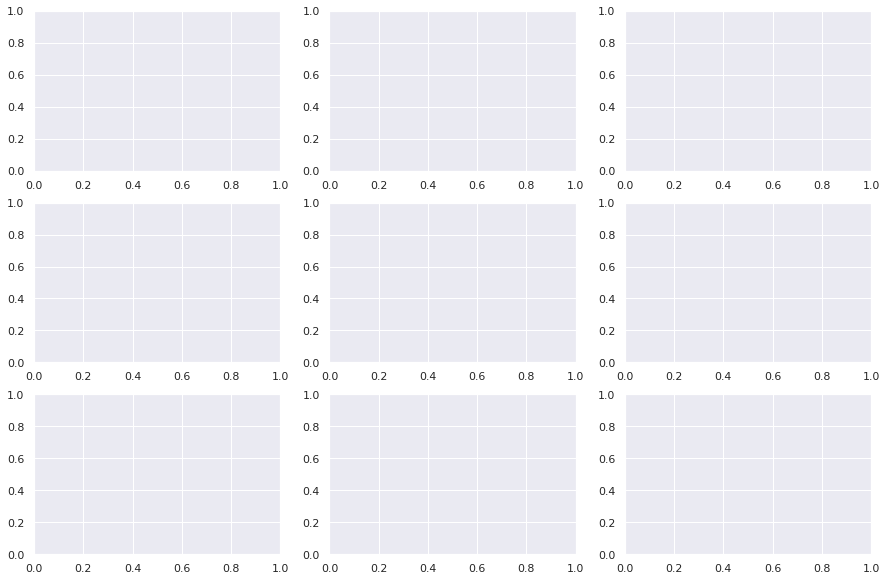

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for rbf_svc, ax in zip(SVC(), axes.flatten()):
    plot_confusion_matrix(rbf_svc, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=target_names)
    ax.title.set_text(type(rbf_svc).__name__)
plt.tight_layout()  
plt.show()



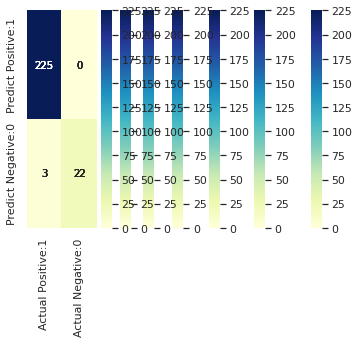

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix_collection = {} 
for i in range(0,7):
  cm_matrix_collection[i] = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

  sns.heatmap(cm_matrix_collection[i], annot=True, fmt='d', cmap='YlGnBu')

**Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report
#for i in range(0,25):
y_test1 = y_test.iloc[:,0] #since distribution of all y_test columns are the same(with three 1 and 75 0), I consider only the first column
print(classification_report(y_test1, y_pred_test))

              precision    recall  f1-score   support

           0       0.56      0.85      0.68       150
           1       0.00      0.00      0.00       100

    accuracy                           0.51       250
   macro avg       0.28      0.43      0.34       250
weighted avg       0.34      0.51      0.41       250



**Classification accuracy**

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9880


**True Positive Rate**

True Positive Rate is synonymous with Recall.

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9868


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9868


**False Positive Rate**

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


**ROC-AUC**

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

**True Positive Rate (TPR) is also called Recal**l. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) **of a single point.** This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

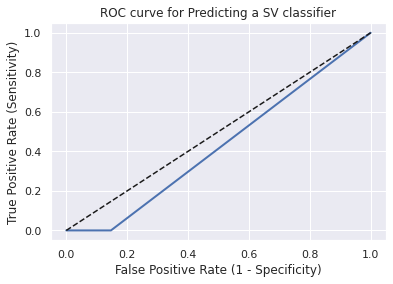

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test.iloc[:,0], y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a SV classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test.iloc[:,0], y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.4267


**Comments**

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

**Support Vectors:**

In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [ ]:
svc.support_vectors_

array([[0.42768974, 0.46905755, 0.92706943, ..., 0.53630446, 0.39926618,
        0.59629754],
       [0.7704754 , 0.76797331, 0.30140187, ..., 0.4211317 , 0.72765177,
        0.73246348],
       [0.46922435, 0.56346956, 0.52536716, ..., 0.58254048, 0.24633089,
        0.64469722],
       ...,
       [0.65688073, 0.43886572, 0.39552737, ..., 0.12652312, 0.55403602,
        0.55882681],
       [0.59499583, 0.6353628 , 0.63918558, ..., 0.39008513, 0.02301534,
        0.39032006],
       [0.60967473, 0.34962469, 0.439753  , ..., 0.38624604, 0.63042028,
        0.57756217]])

**Number of Support Vectors:**

In [ ]:
print(svc.support_vectors_.shape)

(125, 10)


So, the number of support vectors that linear classifier was found is 5.

**RBF classifier:**

So, the number of support vectors that RBF classifier was found is 5.

The number of support vectors depends on how much slack we allow and the distribution of the data. If we allow a large amount of slack, we will have a large number of support vectors. If we allow very little slack, we will have very few support vectors. The accuracy depends on finding the right level of slack for the data being analyzed. Some data it will not be possible to get a high level of accuracy, we must simply find the best fit we can.

By packaging the preprocessor and the classifier into a single pipeline we have:

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc = SVC(kernel='rbf')
model = make_pipeline(svc)

**Hyperparameter Optimization using GridSearch CV**

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:



*   C controls hard or soft margin. 
*   Kernel function converts a problem to high-dimensional problem in order to seperate classes 

 

*   Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular Data Set. One of the examples where there are a lot of features, is Text Classification, as each alphabet is a new feature. So we mostly use Linear Kernel in Text Classification. Linear Kernel does not mean that we have only 2D dataset and hyperplane is a line. Hyperplane is linear and we may have large dimensional dataset or many features.


Advantages of using Linear Kernel:

1. Training a SVM with a Linear Kernel is Faster than with any other Kernel.

2. When training a SVM with a Linear Kernel, only the optimisation of the C Regularisation parameter is required. On the other hand, when training with other kernels, there is a need to optimise the gamma parameter which means that performing a grid search will usually take more time.

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import SVC classifier
from sklearn.svm import SVC

for i in range(0,25):
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
  svc=SVC() 

# declare parameters for hyperparameter tuning
  parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

  grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


  grid_search.fit(X_train, y_train)

So, {'svc__C': 0.5, 'svc__gamma': 0.0001}

C value is the least that shows the least error and gamma value is the least that shows the simplest dicision function. C is a regularization metrci to show error. Lower C means lower error and larger C means larger error. Gamma represents the dicision function curvaty. Lower gamma, linear and higher gamma, more curve of decision boundary.

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:



*   C controls hard or soft margin. 
*   Kernel function converts a problem to high-dimensional problem in order to seperate classes 

 

*   Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular Data Set. One of the examples where there are a lot of features, is Text Classification, as each alphabet is a new feature. So we mostly use Linear Kernel in Text Classification. Linear Kernel does not mean that we have only 2D dataset and hyperplane is a line. Hyperplane is linear and we may have large dimensional dataset or many features.


Advantages of using Linear Kernel:

1. Training a SVM with a Linear Kernel is Faster than with any other Kernel.

2. When training a SVM with a Linear Kernel, only the optimisation of the C Regularisation parameter is required. On the other hand, when training with other kernels, there is a need to optimise the gamma parameter which means that performing a grid search will usually take more time.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

**Grid search to find best parameters for SVM model:**

SVM has some hyperparameters needed to tuned that are as follows: C, gamma for RBF kernel function

Grid search is a way to find the best parameters for any model out of the combinations we specify. I have formed a grid search on my model in the below manner and wish to find best parameters identified using this gridsearch.

**What is one vs all method?**

One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.

It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.So, we need to split multi-class dataset to multiple binary classification problems:

**Run SVM with default hyperparameters**

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters. lets train the model using SVM classifier

We need to separate features set X from the target column (class label) y, and divide the data set to 80% for training, and 20% for testing:

Out of the known metrics for validating machine learning models, we choose Accuracy and F1 as they are the most used in supervised machine learning.

For the **accuracy score**, it shows the percentage of the true positive and true negative to all data points. So, **it’s useful when the data set is balanced.**

For the **f1 score**, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, **it’s useful to calculate the f1 score when the data set isn’t balanced.**

Playing around with **SVM hyperparameters, like C, gamma, and degree in the previous code snippet** will display different results. As we can see, in this problem, SVM with Polynomial kernel function is outperforming SVM with RBF kernel function.

Note: Here, We have class imbalance in this dataset, so, f1 score is the better metric to show validation of machine learning in this problem.